In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
import tensorflow as tf
print('Versão Tensorflow:', ts.__version__)

Versão Tensorflow: 1.13.1


In [60]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [61]:
coluns_name = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
raw_dataset = pd.read_csv(dataset_path, names=coluns_name, na_values='?', comment ='\t', sep=" ",skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [62]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [63]:
dataset.dropna(inplace = True)

In [64]:
origin = dataset.pop('origin')
dataset['USA'] = (origin == 1) * 1.0
dataset['Europa'] = (origin == 2) * 2.0
dataset['Japan'] = (origin == 3) * 3.0

dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,USA,Europa,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,2.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [70]:
# separando dataset por train e test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

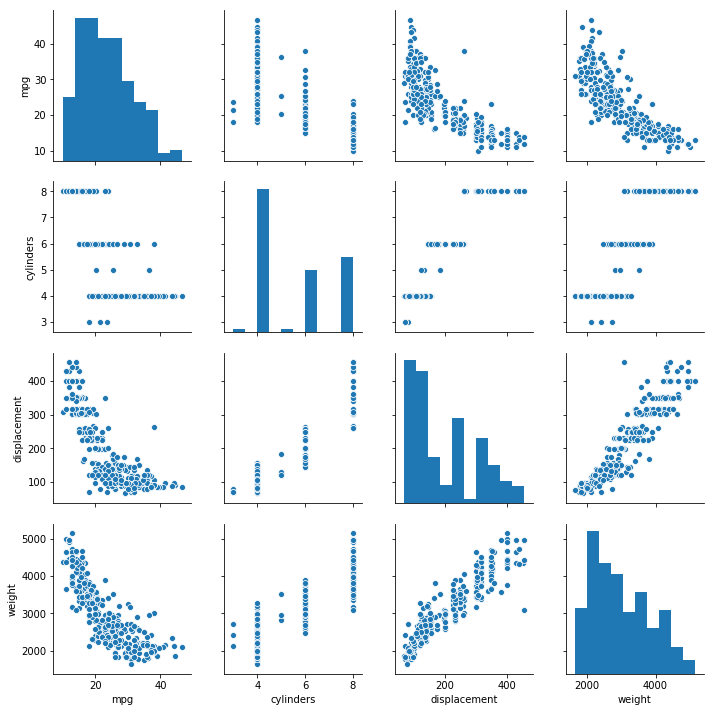

In [55]:
sns.pairplot(train_dataset[['mpg','cylinders','displacement','weight']]);

In [66]:
train_stats =train_dataset.describe()
train_stats.pop("mpg")
train_stats =train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model_year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europa,314.0,0.356688,0.766826,0.0,0.00,0.0,0.00,2.0
Japan,314.0,0.592357,1.196135,0.0,0.00,0.0,0.00,3.0


In [72]:
train_labels = train_dataset.pop('mpg')
test_labels = test_dataset.pop('mpg')

In [73]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [76]:
normed_train_data.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,USA,Europa,Japan
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,-1.286751,2.143005,-0.495225


9

In [92]:
def build_model(ds):
    _model = tf.keras.Sequential([
        tf.layers.Dense(64, activation = tf.nn.relu, input_shape=[len(ds.keys())]),
        tf.layers.Dense(64, activation = tf.nn.relu),
        tf.layers.Dense(1)
    ])
    _optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    _model.compile(loss = 'mean_squared_error',
                 optimizer = _optimizer,
                 metrics = ['mean_absolute_error', 'mean_squared_error'])
    return _model

In [93]:
model = build_model(train_dataset)

In [94]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [95]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.34193325],
       [-0.35367128],
       [-0.7562678 ],
       [-0.31854597],
       [-0.56448084],
       [-0.26944363],
       [-0.60610837],
       [-0.23739724],
       [-0.2713266 ],
       [-0.62761617]], dtype=float32)

In [98]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

In [99]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.480050,0.996005,2.480050,10.510268,2.485498,10.510267,995
996,2.466064,0.941281,2.466064,10.225053,2.453711,10.225053,996
997,2.469102,1.006462,2.469102,9.721101,2.391048,9.721101,997
998,2.398766,0.946281,2.398767,9.789263,2.376239,9.789262,998
999,2.449866,0.977765,2.449866,10.563399,2.466697,10.563399,999


In [114]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()


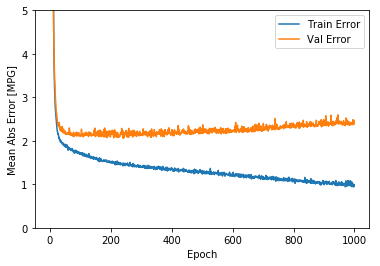

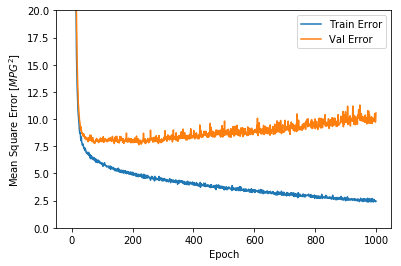

In [115]:
plot_history(history)


.........................................................................

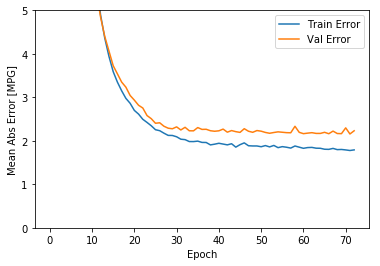

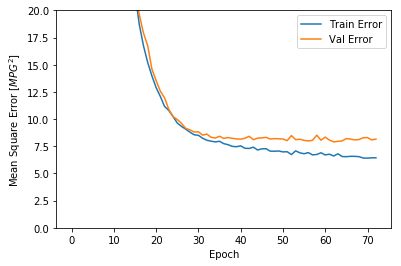

In [118]:
model = build_model(train_dataset)

# The patience parameter is the amount of epochs to check for improvement
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [119]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

In [120]:
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.78 MPG


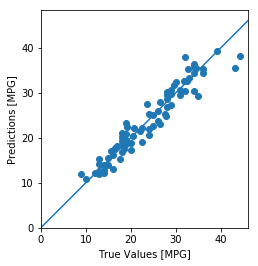

In [121]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

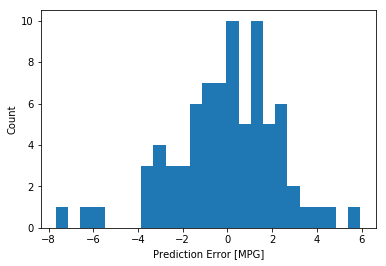

In [122]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")